In [1]:
import pandas as pd 
import numpy as np 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Example: Ignoring specific warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Data Exploratary

In [3]:
fifa=pd.read_csv("Fifa clean data.csv")
fifa.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5,91,85,86,94,36,59,595


In [4]:
fifa.drop(columns=["ID","photoUrl","Volleys","Loan Date End","Short Passing","Curve","playerUrl","Contract","POT","Joined","Crossing","Attacking","Heading Accuracy","Finishing","Movement","Agility","Reactions","Balance","Power","Strength","Long Shots","Mentality","Aggression","Interceptions","Positioning","Composure","Marking","Standing Tackle","Sliding Tackle","GK Diving","GK Handling","GK Kicking","GK Positioning","Total Stats","Hits","Defending"],axis=1,inplace=True)


In [5]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            18979 non-null  object
 1   LongName        18979 non-null  object
 2   Nationality     18979 non-null  object
 3   Age             18979 non-null  int64 
 4   OVA             18979 non-null  int64 
 5   Club            18979 non-null  object
 6   Positions       18979 non-null  object
 7   Height          18979 non-null  object
 8   Weight          18979 non-null  object
 9   Preferred Foot  18979 non-null  object
 10  BOV             18979 non-null  int64 
 11  Best Position   18979 non-null  object
 12  Value           18979 non-null  object
 13  Wage            18979 non-null  object
 14  Release Clause  18979 non-null  object
 15  Skill           18979 non-null  int64 
 16  Dribbling       18979 non-null  int64 
 17  FK Accuracy     18979 non-null  int64 
 18  Long P

In [6]:
fifa.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,18979.0,25.194109,4.710520,16.0,21.0,25.0,29.0,53.0
OVA,18979.0,65.718636,6.968999,47.0,61.0,66.0,70.0,93.0
BOV,18979.0,66.751726,6.747193,48.0,62.0,67.0,71.0,93.0
Skill,18979.0,256.479214,78.650601,40.0,222.0,269.0,310.0,470.0
Dribbling,18979.0,55.587491,18.761314,5.0,49.0,61.0,68.0,96.0
FK Accuracy,18979.0,42.391011,17.227947,5.0,31.0,41.0,55.0,94.0
Long Passing,18979.0,52.725381,15.178151,5.0,43.0,56.0,64.0,93.0
Ball Control,18979.0,58.528373,16.565892,5.0,54.0,63.0,69.0,96.0
Acceleration,18979.0,64.357553,14.889981,13.0,57.0,67.0,74.0,97.0
Sprint Speed,18979.0,64.412930,14.638743,12.0,57.0,67.0,74.0,96.0


In [7]:
fifa.duplicated().sum()

0

In [8]:
fifa.isnull().sum().sort_values(ascending=False)

Name              0
Sprint Speed      0
Jumping           0
Stamina           0
Vision            0
Penalties         0
Goalkeeping       0
GK Reflexes       0
Base Stats        0
W/F               0
SM                0
A/W               0
D/W               0
IR                0
PAC               0
SHO               0
PAS               0
DRI               0
DEF               0
Shot Power        0
Acceleration      0
LongName          0
Ball Control      0
Nationality       0
Age               0
OVA               0
Club              0
Positions         0
Height            0
Weight            0
Preferred Foot    0
BOV               0
Best Position     0
Value             0
Wage              0
Release Clause    0
Skill             0
Dribbling         0
FK Accuracy       0
Long Passing      0
PHY               0
dtype: int64

In [9]:
fifa["Club"]=fifa["Club"].str.strip( )
fifa["Club"]

0               FC Barcelona
1                   Juventus
2            Atlético Madrid
3            Manchester City
4        Paris Saint-Germain
                ...         
18974             Wuhan Zall
18975        Oldham Athletic
18976             Derry City
18977       Dalian YiFang FC
18978       Dalian YiFang FC
Name: Club, Length: 18979, dtype: object

In [10]:
for col in ['Age', 'OVA',"BOV"]:
    fifa[col] = fifa[col].astype(int)

# DATA Analysis

In [11]:
x=fifa["Nationality"].value_counts().head(10)
x

Nationality
England        1705
Germany        1195
Spain          1065
France         1003
Argentina       943
Brazil          887
Japan           485
Netherlands     438
Italy           387
Sweden          380
Name: count, dtype: int64

In [12]:
u=px.bar(x,color=x,title="Top 10 Country Wise Representation in the FIFA Game")
u.show()

In [13]:
Country_Best_Averg=fifa.groupby('Nationality').apply(lambda x:np.average(x['BOV'])).reset_index(name='Overall Ratings')
Country_Best_Count=fifa.groupby('Nationality').apply(lambda x:x['BOV'].count()).reset_index(name='Player Counts')
snt_best_avg_cnt=pd.merge(Country_Best_Averg,Country_Best_Count,how='inner',left_on='Nationality',right_on='Nationality')
sel_best_avg_cnt=snt_best_avg_cnt[snt_best_avg_cnt['Player Counts']>=200]
sel_best_avg_cnt.sort_values(by=['Overall Ratings','Player Counts'],ascending=[False,False])
px.scatter(sel_best_avg_cnt,x='Overall Ratings',y='Player Counts',color='Player Counts',size='Overall Ratings',hover_data=['Nationality'],title='Nationality Wise Player counts and Average Potential')


C:\Users\Haris\AppData\Local\Temp\ipykernel_21672\1773320647.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Haris\AppData\Local\Temp\ipykernel_21672\1773320647.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [14]:
fifa["Age"].describe()

count    18979.000000
mean        25.194109
std          4.710520
min         16.000000
25%         21.000000
50%         25.000000
75%         29.000000
max         53.000000
Name: Age, dtype: float64

In [15]:
age_cnt=fifa.groupby('Age').apply(lambda x:x['Name'].count()).reset_index(name='Counts')
fig=px.bar(age_cnt,x='Age',y='Counts',color='Counts',title='Agewise Player distribution in FIFA 21')
fig.show()

C:\Users\Haris\AppData\Local\Temp\ipykernel_21672\380229794.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [16]:
top_player=fifa[["Name","OVA","Club","Age","Best Position","Value"]]
top_player.sort_values(by="OVA",ascending=False,inplace=True)
top_20_player=top_player[:30]
f=px.scatter(top_20_player,x="Age",y="OVA",color="Age",size='OVA',hover_data=['Name','Club','Best Position',"Value"],title='BEST PLAYER IN  FIFA 21')
f.show()

C:\Users\Haris\AppData\Local\Temp\ipykernel_21672\3300001449.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
cnt_best_avg=fifa.groupby('Club').apply(lambda x:np.average(x['BOV'])).reset_index(name='Overall Rating')
x=cnt_best_avg.sort_values(by="Overall Rating",ascending=False).head(20)
x

C:\Users\Haris\AppData\Local\Temp\ipykernel_21672\413228033.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,Club,Overall Rating
216,FC Bayern München,82.217391
490,Real Madrid,80.433333
330,Inter,80.038462
414,Napoli,79.500000
339,Juventus,79.285714
131,Chelsea,79.060606
452,Paris Saint-Germain,78.866667
387,Manchester United,78.818182
555,Sevilla FC,78.285714
374,Liverpool,78.272727


In [18]:
g=px.bar(x["Overall Rating"],x["Club"],color=x["Overall Rating"],title="Top 20 Club Over Rate in FIFA 21")
g.show()

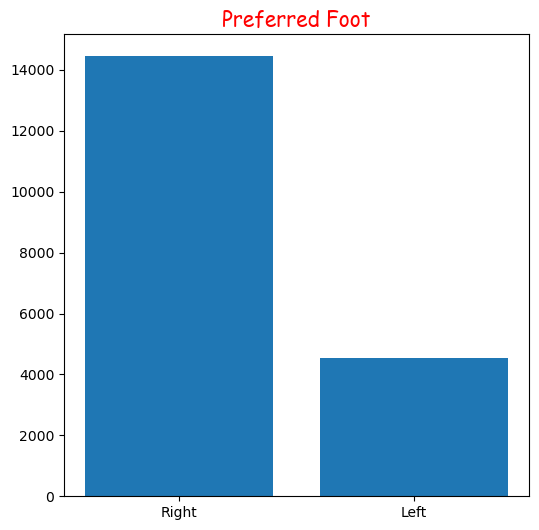

In [19]:
y=fifa["Preferred Foot"].value_counts()
plt.figure(figsize=(6,6))
plt.title("Preferred Foot",fontdict={"fontname":"Comic Sans MS","fontsize":15},color="red")
plt.bar(y.index,y.values)
plt.show()

In [20]:
Bp=fifa["Best Position"].value_counts()
Bp

Best Position
CB     3686
ST     2680
CAM    2299
GK     2075
RM     1611
CDM    1445
LB     1086
RB     1079
CM     1047
LM      871
RW      298
RWB     277
LWB     261
LW      186
CF       78
Name: count, dtype: int64

In [21]:
plt.figure(figsize=(10,6))
b=px.bar(Bp,color=Bp)
b.show()

<Figure size 1000x600 with 0 Axes>

In [22]:
def convert_notation(value):
    if pd.isna(value):
        return np.nan
    value = str(value).upper().strip()
    if 'M' in value:
        return float(value.replace('M', '').replace(',', '').strip()) * 1_000_000
    elif 'K' in value:
        return float(value.replace('K', '').replace(',', '').strip()) * 1_000
    else:
        return float(value.replace(',', '').strip())
        

      


In [23]:
fifa["Value"]=fifa["Value"].str.strip("€")
fifa["Value"] = fifa["Value"].apply(convert_notation)
fifa["Wage"]=fifa["Wage"].str.strip("€")
fifa["Wage"] = fifa["Wage"].apply(convert_notation)


In [24]:
p=fifa[["Name","Club","BOV","Value","Wage"]].sort_values(by=["Value","Wage"],ascending=[False,False]).head(20)
p

,Name,Club,BOV,Value,Wage
8,K. Mbappé,Paris Saint-Germain,91,185500000.0,160000.0
4,Neymar Jr,Paris Saint-Germain,91,132000000.0,270000.0
3,K. De Bruyne,Manchester City,91,129000000.0,370000.0
29,J. Sancho,Borussia Dortmund,89,124000000.0,82000.0
65,K. Havertz,Chelsea,87,121000000.0,105000.0
6,M. Salah,Liverpool,90,120500000.0,250000.0
11,S. Mané,Liverpool,90,120500000.0,250000.0
2,J. Oblak,Atlético Madrid,91,120000000.0,125000.0
18,R. Sterling,Manchester City,88,114500000.0,270000.0
30,T. Alexander-Arnold,Liverpool,87,114000000.0,110000.0


In [25]:
fig=px.scatter(p,x='Value',y='Wage',color='Value',size='Wage',hover_data=["Name","Club","BOV","Value","Wage"],title="Top 20 Player Salary and Value in FIFA 21")
fig.show()

In [26]:
s=fifa[["Name","Club","BOV","Skill","DRI"]].sort_values(by=["DRI","Skill"],ascending=[False,False]).head(10)
s

,Name,Club,BOV,Skill,DRI
0,L. Messi,FC Barcelona,93,470,95
4,Neymar Jr,Paris Saint-Germain,91,448,94
21,P. Dybala,Juventus,89,436,92
26,E. Hazard,Real Madrid,88,427,92
31,Bernardo Silva,Manchester City,87,411,92
81,L. Insigne,Napoli,85,425,91
131,Douglas Costa,FC Bayern München,84,410,91
8,K. Mbappé,Paris Saint-Germain,91,394,91
29,J. Sancho,Borussia Dortmund,89,380,91
88,Thiago,Liverpool,85,432,90


In [27]:
fig=px.scatter(s,x='Skill',y='DRI',color='Skill',size='DRI',hover_data=["Name","Club","BOV","Skill","DRI"],title="Top 10 Player have a Skills and Dribbling in FIFA 21")
fig.show()

In [28]:
FK=fifa[["Name","Club","FK Accuracy"]].sort_values(by="FK Accuracy",ascending=False).head(20)
FK

,Name,Club,FK Accuracy
0,L. Messi,FC Barcelona,94
78,Parejo,Villarreal CF,93
97,M. Pjanić,FC Barcelona,92
523,E. Bardhi,Levante UD,91
1444,A. Zamorado,No Club,91
474,S. Giovinco,Al Hilal,91
10101,S. Nakamura,Yokohama FC,90
4,Neymar Jr,Paris Saint-Germain,89
612,J. Ward-Prowse,Southampton,89
4319,Aketxe,UD Almería,89


In [29]:
fig=px.scatter(FK,x='FK Accuracy',color='FK Accuracy',size="FK Accuracy",hover_data=["Name","Club","FK Accuracy"],title="Top 20 Player Score Free Kicks in FIFA 21")
fig.show()

In [30]:
Best_Player_Penalties=fifa[["Name","Club","Penalties"]].sort_values(by=["Penalties"],ascending=[False]).head(10)
Best_Player_Penalties

,Name,Club,Penalties
1937,M. Noble,West Ham United,92
119,R. Jiménez,Wolverhampton Wanderers,92
16,Sergio Ramos,Real Madrid,92
4,Neymar Jr,Paris Saint-Germain,92
355,M. Kruse,1. FC Union Berlin,92
344,S. Haller,West Ham United,91
34,Bruno Fernandes,Manchester United,91
172,Jorginho,Chelsea,91
98,M. Reus,Borussia Dortmund,91
229,A. Kramarić,TSG 1899 Hoffenheim,90


In [31]:
Faster_Player=fifa[["Name","Club","Acceleration","PAC"]].sort_values(by=["PAC","Acceleration"],ascending=[False,False]).head(20)
Faster_Player

,Name,Club,Acceleration,PAC
573,Adama Traoré,Wolverhampton Wanderers,97,96
8,K. Mbappé,Paris Saint-Germain,96,96
284,A. Davies,FC Bayern München,96,96
1080,D. James,Manchester United,96,95
370,Vinícius Jr.,Real Madrid,95,95
5934,A. Chalá,Dijon FCO,93,95
11,S. Mané,Liverpool,95,94
726,I. Sarr,Watford,95,94
1983,C. Ejuke,PFC CSKA Moscow,95,94
423,Gelson Martins,AS Monaco,94,94


In [32]:
fig=px.scatter(Faster_Player,x='Acceleration',y="PAC",color='PAC',size="PAC",hover_data=["Name","Club","Acceleration","PAC"],title="Top 10 Fastest Players in FIFA 21")
fig.show()

In [33]:
Gk=fifa[["LongName","Club","Age","Goalkeeping","GK Reflexes","BOV"]].sort_values(by=["Goalkeeping","GK Reflexes","BOV"],ascending=[False,False,False]).head(10)
Gk

,LongName,Club,Age,Goalkeeping,GK Reflexes,BOV
14,Manuel Neuer,FC Bayern München,34,440,89,89
9,Marc-André ter Stegen,FC Barcelona,28,439,90,90
7,Alisson Ramses Becker,Liverpool,27,439,89,90
2,Jan Oblak,Atlético Madrid,27,437,90,91
22,Ederson Santana de Moraes,Manchester City,26,435,88,88
24,Samir Handanovič,Inter,35,424,89,88
57,Yann Sommer,Borussia Mönchengladbach,31,423,85,86
91,Péter Gulácsi,RB Leipzig,30,421,86,85
13,Thibaut Courtois,Real Madrid,28,420,88,89
101,André Onana,Ajax,24,419,86,84


In [34]:
fig=px.scatter(Gk,x='Goalkeeping',y='GK Reflexes',color='Goalkeeping',size="GK Reflexes",hover_data=["LongName","Club","Goalkeeping","GK Reflexes"],title="Best 10 Goalkeepers  in FIFA 21")
fig.show()

In [35]:
sho=fifa[["Name","Shot Power"]].sort_values(by=["Shot Power"],ascending=False).head(10)
sho

,Name,Shot Power
271,A. Kolarov,95
470,Hulk,94
1,Cristiano Ronaldo,94
105,E. Haaland,93
23,H. Kane,91
3,K. De Bruyne,91
440,G. Xhaka,90
537,R. Malinovskyi,90
68,M. Rashford,90
2019,L. Podolski,90


In [36]:
stm=fifa[["Name","Stamina"]].sort_values(by=["Stamina"],ascending=False).head(10)
stm

,Name,Stamina
955,V. Darida,97
19,N. Kanté,96
32,A. Robertson,95
5530,H. Okuno,95
20,J. Kimmich,95
941,J. Buffarini,94
84,Koke,94
4130,C. Fuentes,94
2209,C. Mayada,94
1392,J. Mæhle,94


In [37]:
PAS=fifa[["Name","PAS"]].sort_values(by=["PAS"],ascending=False).head(10)
PAS

,Name,PAS
3,K. De Bruyne,93
22,Ederson,93
0,L. Messi,91
27,T. Kroos,91
14,M. Neuer,91
2728,I. Khune,90
78,Parejo,90
44,L. Modrić,89
58,David Silva,88
9,M. ter Stegen,88


In [38]:
Best_Definder=fifa[["Name","Club","Age","DEF","BOV"]].sort_values(by=["DEF","BOV"],ascending=[False,False]).head(10)
Best_Definder

,Name,Club,Age,DEF,BOV
10,V. van Dijk,Liverpool,28,91,90
39,G. Chiellini,Juventus,35,90,87
25,K. Koulibaly,Napoli,29,89,88
56,M. Hummels,Borussia Dortmund,31,89,86
16,Sergio Ramos,Real Madrid,34,88,89
33,A. Laporte,Manchester City,26,88,88
51,R. Varane,Real Madrid,27,87,87
74,Marquinhos,Paris Saint-Germain,26,87,87
99,W. Ndidi,Leicester City,23,87,87
67,M. Škriniar,Inter,25,87,86


In [39]:
PH=fifa[["Name","Club","Age","PHY"]].sort_values(by=["PHY"],ascending=False).head(10)
PH

,Name,Club,Age,PHY
4122,A. Méndez,Nacional de Montevideo,24,91
262,G. Buffon,Juventus,42,91
12,Casemiro,Real Madrid,28,91
7,Alisson,Liverpool,27,91
2,J. Oblak,Atlético Madrid,27,90
551,M. Marega,FC Porto,29,90
527,D. Dumfries,PSV,24,89
4139,Garrido,Cádiz CF,30,89
659,M. Sissoko,Tottenham Hotspur,30,89
24,S. Handanovič,Inter,35,89


In [40]:
JG=fifa[["Name","Club","Age","Jumping"]].sort_values(by=["Jumping"],ascending=False).head(10)
JG

,Name,Club,Age,Jumping
1,Cristiano Ronaldo,Juventus,35,95
1074,K. Diatta,Club Brugge KV,21,94
1368,E. Dennis,Club Brugge KV,22,94
4029,M. Barbieri,Club Tijuana,26,94
11684,M. Saito,Shonan Bellmare,21,94
5826,E. Sabbi,Odense Boldklub,22,94
7094,T. Hasegawa,Kawasaki Frontale,26,94
1258,Aurélio Buta,Royal Antwerp FC,23,93
2047,S. Long,Southampton,33,93
5444,Y. Yoshida,Nagoya Grampus,30,93


# Barcelona Team Player

In [41]:
barca_team_all_players=fifa[fifa['Club']=='FC Barcelona']
barca_team_all_players

,Name,LongName,Nationality,Age,OVA,Club,Positions,Height,Weight,Preferred Foot,...,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY
0,L. Messi,Lionel Messi,Argentina,33,93,FC Barcelona,"RW, ST, CF",170cm,72kg,Left,...,4,Medium,Low,5,85,92,91,95,38,65
9,M. ter Stegen,Marc-André ter Stegen,Germany,28,90,FC Barcelona,GK,187cm,85kg,Right,...,1,Medium,Medium,3,88,85,88,90,45,88
28,A. Griezmann,Antoine Griezmann,France,29,87,FC Barcelona,"ST, CF, LW",176cm,73kg,Left,...,4,Medium,Medium,4,79,85,84,88,57,72
40,Sergio Busquets,Sergio Busquets Burgos,Spain,31,87,FC Barcelona,"CDM, CM",189cm,76kg,Right,...,3,Medium,Medium,4,42,62,80,80,83,77
55,Piqué,Gerard Piqué Bernabeu,Spain,33,86,FC Barcelona,CB,194cm,85kg,Right,...,2,High,Medium,4,57,61,71,67,86,80
60,Jordi Alba,Jordi Alba Ramos,Spain,31,86,FC Barcelona,LB,170cm,68kg,Left,...,3,High,Medium,3,88,69,81,83,78,72
73,C. Lenglet,Clément Lenglet,France,25,85,FC Barcelona,CB,186cm,81kg,Left,...,2,Medium,High,2,74,45,67,65,87,81
80,F. de Jong,Frenkie de Jong,Netherlands,23,85,FC Barcelona,CM,180cm,74kg,Right,...,4,Medium,High,3,80,64,84,87,76,77
97,M. Pjanić,Miralem Pjanić,Bosnia Herzegovina,30,85,FC Barcelona,CM,178cm,72kg,Right,...,3,Medium,Medium,3,67,68,87,85,75,67
144,O. Dembélé,Ousmane Dembélé,France,23,83,FC Barcelona,"LW, RW",178cm,67kg,Left,...,5,High,Medium,3,92,77,77,87,36,56


In [42]:
barca_team_all_players=fifa[fifa['Club']=='FC Barcelona']
# Create a colormap
cm = sns.light_palette("yellow", as_cmap=True)

# Apply background gradient and format the Overall Score
styled_df = barca_team_all_players.style.background_gradient(cmap=cm).format({"Overall Score": "{:.2f}"})

# Display the styled DataFrame
styled_df


,Name,LongName,Nationality,Age,OVA,Club,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Value,Wage,Release Clause,Skill,Dribbling,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Shot Power,Jumping,Stamina,Vision,Penalties,Goalkeeping,GK Reflexes,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY
0,L. Messi,Lionel Messi,Argentina,33,93,FC Barcelona,"RW, ST, CF",170cm,72kg,Left,93,RW,103500000.000000,560000.000000,138.4M,470,96,94,91,96,91,80,86,68,72,95,75,54,8,466,4,4,Medium,Low,5,85,92,91,95,38,65
9,M. ter Stegen,Marc-André ter Stegen,Germany,28,90,FC Barcelona,GK,187cm,85kg,Right,90,GK,110000000.000000,260000.000000,147.7M,144,21,12,63,30,38,50,66,79,35,70,25,439,90,484,4,1,Medium,Medium,3,88,85,88,90,45,88
28,A. Griezmann,Antoine Griezmann,France,29,87,FC Barcelona,"ST, CF, LW",176cm,73kg,Left,87,ST,79500000.000000,290000.000000,103.5M,429,87,85,82,89,80,79,81,90,86,85,86,63,14,465,3,4,Medium,Medium,4,79,85,84,88,57,72
40,Sergio Busquets,Sergio Busquets Burgos,Spain,31,87,FC Barcelona,"CDM, CM",189cm,76kg,Right,87,CDM,56000000.000000,240000.000000,77.9M,386,81,68,83,88,40,43,61,66,81,84,60,48,13,424,3,3,Medium,Medium,4,42,62,80,80,83,77
55,Piqué,Gerard Piqué Bernabeu,Spain,33,86,FC Barcelona,CB,194cm,85kg,Right,86,CB,32500000.000000,220000.000000,43.1M,325,63,43,81,80,48,64,62,74,69,72,69,58,8,422,3,2,High,Medium,4,57,61,71,67,86,80
60,Jordi Alba,Jordi Alba Ramos,Spain,31,86,FC Barcelona,LB,170cm,68kg,Left,86,LB,49500000.000000,220000.000000,65.6M,387,81,63,79,84,88,88,64,80,88,78,59,60,13,471,3,3,High,Medium,3,88,69,81,83,78,72
73,C. Lenglet,Clément Lenglet,France,25,85,FC Barcelona,CB,186cm,81kg,Left,86,CB,67000000.000000,190000.000000,94.6M,297,57,31,74,76,76,72,58,85,75,66,49,48,7,419,4,2,Medium,High,2,74,45,67,65,87,81
80,F. de Jong,Frenkie de Jong,Netherlands,23,85,FC Barcelona,CM,180cm,74kg,Right,87,CM,81000000.000000,190000.000000,107.3M,409,87,64,86,88,80,80,68,76,90,86,45,49,9,468,3,4,Medium,High,3,80,64,84,87,76,77
97,M. Pjanić,Miralem Pjanić,Bosnia Herzegovina,30,85,FC Barcelona,CM,178cm,72kg,Right,85,CM,51500000.000000,220000.000000,72.8M,440,86,92,87,89,68,66,78,59,81,88,79,42,8,449,4,3,Medium,Medium,3,67,68,87,85,75,67
144,O. Dembélé,Ousmane Dembélé,France,23,83,FC Barcelona,"LW, RW",178cm,67kg,Left,85,LM,57500000.000000,175000.000000,79.9M,395,89,64,76,84,93,92,83,58,68,76,75,49,13,425,5,5,High,Medium,3,92,77,77,87,36,56


# FIFA TEAM IN 21

In [43]:
FIFA_TEAM_21=fifa[['Name','Age','BOV','Best Position','Club']]
pos_play=FIFA_TEAM_21.groupby('Best Position').apply(lambda x:np.max(x['BOV'])).reset_index(name='Overall Score')
player_pos=pd.merge(FIFA_TEAM_21,pos_play,how='inner',left_on=['Best Position','BOV'],right_on=['Best Position','Overall Score'])
pos_best=player_pos[['Name','Club','Age','Best Position','Overall Score']]
cm = sns.light_palette("yellow", as_cmap=True) 
#pos_best.style.background_gradient(cmap=cm).set_precision(2)

C:\Users\Haris\AppData\Local\Temp\ipykernel_21672\4158501163.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [44]:
import pandas as pd
import seaborn as sns

# Sample DataFrame (replace this with your actual DataFrame)
pos_best = player_pos[['Name', 'Club', 'Age', 'Best Position', 'Overall Score']]

# Create a colormap
cm = sns.light_palette("yellow", as_cmap=True)

# Apply background gradient and format the Overall Score
styled_df = pos_best.style.background_gradient(cmap=cm).format({"Overall Score": "{:.2f}"})

# Display the styled DataFrame
styled_df


,Name,Club,Age,Best Position,Overall Score
0,L. Messi,FC Barcelona,33,RW,93.00
1,Cristiano Ronaldo,Juventus,35,ST,92.00
2,J. Oblak,Atlético Madrid,27,GK,91.00
3,K. De Bruyne,Manchester City,29,CAM,91.00
4,Neymar Jr,Paris Saint-Germain,28,LW,91.00
5,V. van Dijk,Liverpool,28,CB,90.00
6,Casemiro,Real Madrid,28,CDM,89.00
7,K. Benzema,Real Madrid,32,CF,89.00
8,T. Kroos,Real Madrid,30,CM,88.00
9,T. Alexander-Arnold,Liverpool,21,RB,87.00


In [ ]:
fifa.drop(columns=["ID","photoUrl","Volleys","Loan Date End","Short Passing","Curve","playerUrl","Contract","POT","Joined","Crossing","Attacking","Heading Accuracy","Finishing","Movement","Agility","Reactions","Balance","Power","Strength","Long Shots","Mentality","Aggression","Interceptions","Positioning","Composure","Marking","Standing Tackle","Sliding Tackle","GK Diving","GK Handling","GK Kicking","GK Positioning","Total Stats","Hits","Defending"],axis=1,inplace=True)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# Encode categorical variables
encoder = LabelEncoder()
fifa['Preferred Foot'] = encoder.fit_transform(fifa['Preferred Foot'])
fifa['Best Position'] = encoder.fit_transform(fifa['Best Position'])
fifa['Club'] = encoder.fit_transform(fifa['Club'])

# Select features and target
X = fifa[['Age', 'Preferred Foot', 'Skill', 'PAC', 'DEF', 'DRI', 'PHY', 'Value', 'Wage']]
y = fifa['BOV']  # Target: Best Overall Value

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)  # 40% goes to temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Split temp into 20% each

# Save splits to CSV files
train_df = pd.DataFrame(X_train, columns=X.columns)
train_df['BOV'] = y_train.reset_index(drop=True)
train_df.to_csv('train_dataset.csv', index=False)

val_df = pd.DataFrame(X_val, columns=X.columns)
val_df['BOV'] = y_val.reset_index(drop=True)
val_df.to_csv('validation_dataset.csv', index=False)

test_df = pd.DataFrame(X_test, columns=X.columns)
test_df['BOV'] = y_test.reset_index(drop=True)
test_df.to_csv('test_dataset.csv', index=False)

print("Datasets have been split and saved as CSV files.")


Datasets have been split and saved as CSV files.


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
encoder = LabelEncoder()
fifa['Preferred Foot'] = encoder.fit_transform(fifa['Preferred Foot'])
fifa['Best Position'] = encoder.fit_transform(fifa['Best Position'])
fifa['Club'] = encoder.fit_transform(fifa['Club'])

# Select features and target
X = fifa[['Age', 'Preferred Foot', 'Skill', 'PAC', 'DEF', 'DRI', 'PHY', 'Value', 'Wage']]
y = fifa['BOV']  # Target: Best Overall Value

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)





In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse:.2f}, R2 Score: {r2:.2f}")


evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")


Random Forest Regressor - Mean Squared Error: 0.83, R2 Score: 0.98


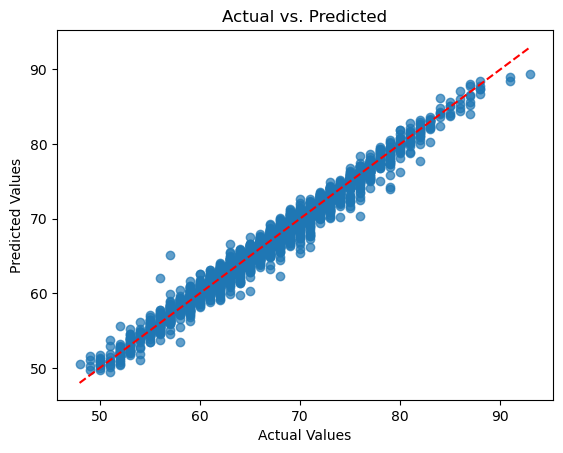

In [47]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.show()


# Save the model to a .pkl file

In [48]:
import pickle

# Save the model to a .pkl file
model_filename = "random_forest_model.pkl"#random_forest_model.pkl
with open(model_filename, "wb") as file:
    pickle.dump(rf_model, file)

print(f"Model saved to {model_filename}")


Model saved to random_forest_model.pkl


# Loading the Model Later
To load the saved model for inference or further evaluation

In [49]:
with open(model_filename, "rb") as file:
    loaded_model = pickle.load(file)

# Example usage
y_pred_loaded = loaded_model.predict(X_test)
evaluate_model(y_test, y_pred_loaded, "Loaded Random Forest Regressor")


Loaded Random Forest Regressor - Mean Squared Error: 0.83, R2 Score: 0.98


Overwriting fifa_app.py
